In [1]:
import os
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.signal import welch
from tsfresh.feature_extraction import feature_calculators

In [2]:
pdf_trn = pd.read_csv("../input/train_clean.csv")
pdf_tst  = pd.read_csv("../input/test_clean.csv")

with open('../input/batch_ids_trn.pkl', 'rb') as f:
    batch_id_trn = pickle.load(f)
with open('../input/batch_ids_tst.pkl', 'rb') as f:
    batch_id_tst = pickle.load(f)

In [21]:
def wrapped_spkt_welch_density(srs, c): return list(feature_calculators.spkt_welch_density(srs, [{'coeff': c}]))[0][1]

In [35]:
a = 1776000
print(feature_calculators.binned_entropy(pdf_trn.signal.iloc[a:a+11], max_bins=10))
print(wrapped_spkt_welch_density(pdf_trn.signal.iloc[a:a+11], -5))

1.515707952085713
1.3168391565758348


In [3]:
def create_axes_grid(numplots_x, numplots_y, plotsize_x=6, plotsize_y=3):
    fig, axes = plt.subplots(numplots_y, numplots_x)
    fig.set_size_inches(plotsize_x * numplots_x, plotsize_y * numplots_y)
    return fig, axes
    
def set_axes(axes, use_grid=True, x_val = [0,100,10,5], y_val = [-50,50,10,5]):
    axes.grid(use_grid)
    axes.tick_params(which='both', direction='inout', top=True, right=True, labelbottom=True, labelleft=True)
    axes.set_xlim(x_val[0], x_val[1])
    axes.set_ylim(y_val[0], y_val[1])
    axes.set_xticks(np.linspace(x_val[0], x_val[1], np.around((x_val[1] - x_val[0]) / x_val[2] + 1).astype(int)))
    axes.set_xticks(np.linspace(x_val[0], x_val[1], np.around((x_val[1] - x_val[0]) / x_val[3] + 1).astype(int)), minor=True)
    axes.set_yticks(np.linspace(y_val[0], y_val[1], np.around((y_val[1] - y_val[0]) / y_val[2] + 1).astype(int)))
    axes.set_yticks(np.linspace(y_val[0], y_val[1], np.around((y_val[1] - y_val[0]) / y_val[3] + 1).astype(int)), minor=True)

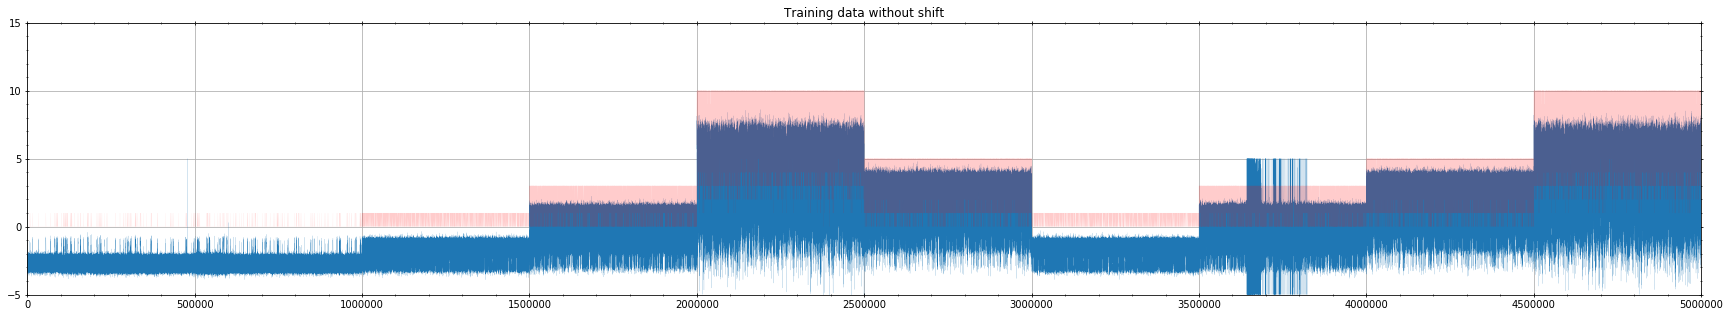

In [11]:
_, axes_final_signal = create_axes_grid(1, 1, 30, 5)
set_axes(axes_final_signal, x_val=[0, 5000000, 500000, 100000], y_val=[-5, 15, 5, 1])
axes_final_signal.plot(pdf_trn['signal'], linewidth=.1);
axes_final_signal.plot(pdf_trn['open_channels'], color='red', linewidth=.1, linestyle='-', alpha=.2)
axes_final_signal.set_title("Training data without shift");

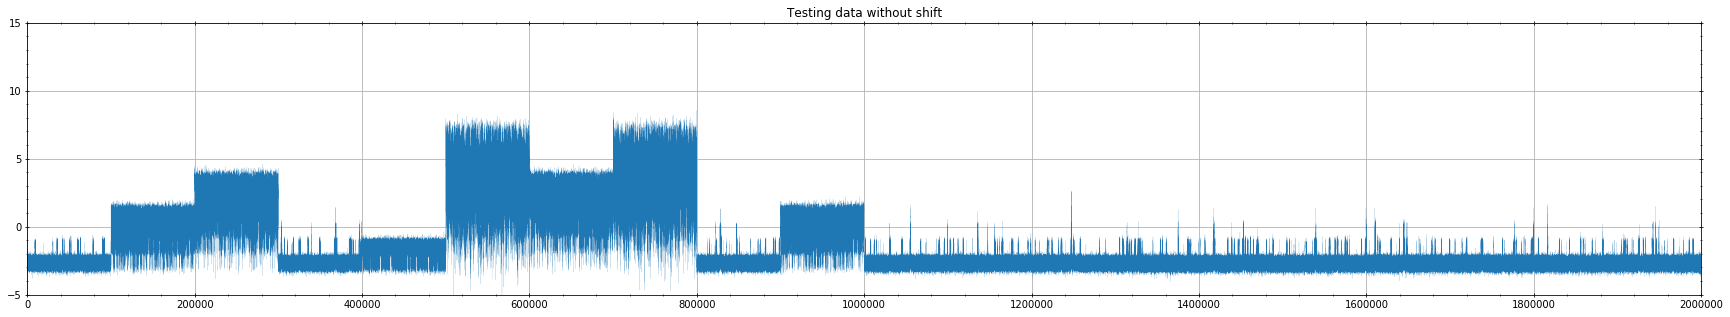

In [9]:
_, axes_final_test_signal = create_axes_grid(1, 1, 30, 5)
set_axes(axes_final_test_signal, x_val=[0, 2000000, 200000, 40000], y_val=[-5, 15, 5, 1])
axes_final_test_signal.plot(pdf_tst['signal'], linewidth=.1);
axes_final_test_signal.set_title("Testing data without shift");

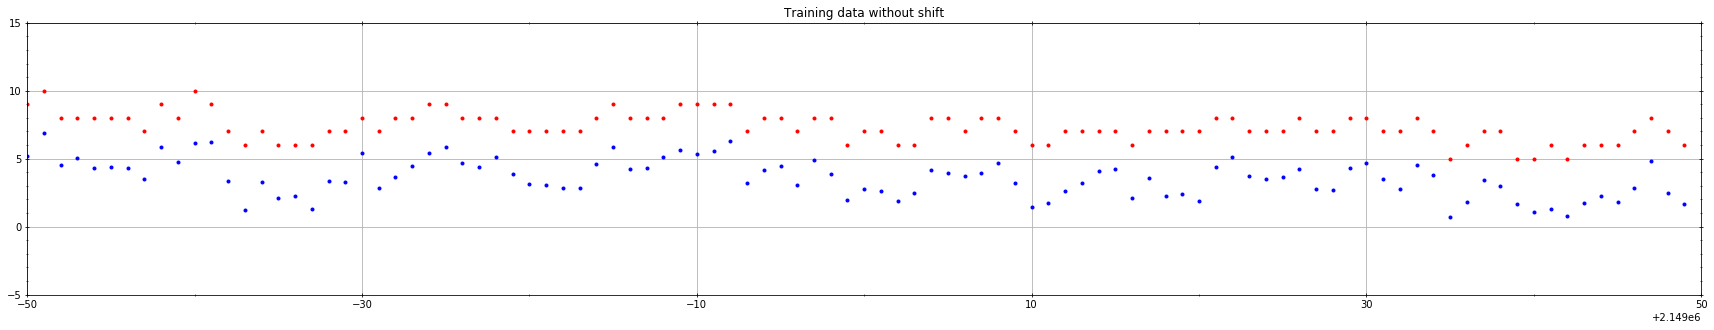

In [10]:
_, axes_final_signal = create_axes_grid(1, 1, 30, 5)
# a, b = 1499990, 1500010
increment = 0
a, b = 2148950+increment, 2149050+increment
set_axes(axes_final_signal, x_val=[a, b, 20, 10], y_val=[-5, 15, 5, 1])
axes_final_signal.plot(pdf_trn['signal'].iloc[a:b], 'b.');
axes_final_signal.plot(pdf_trn['open_channels'].iloc[a:b], 'r.')
axes_final_signal.set_title("Training data without shift");

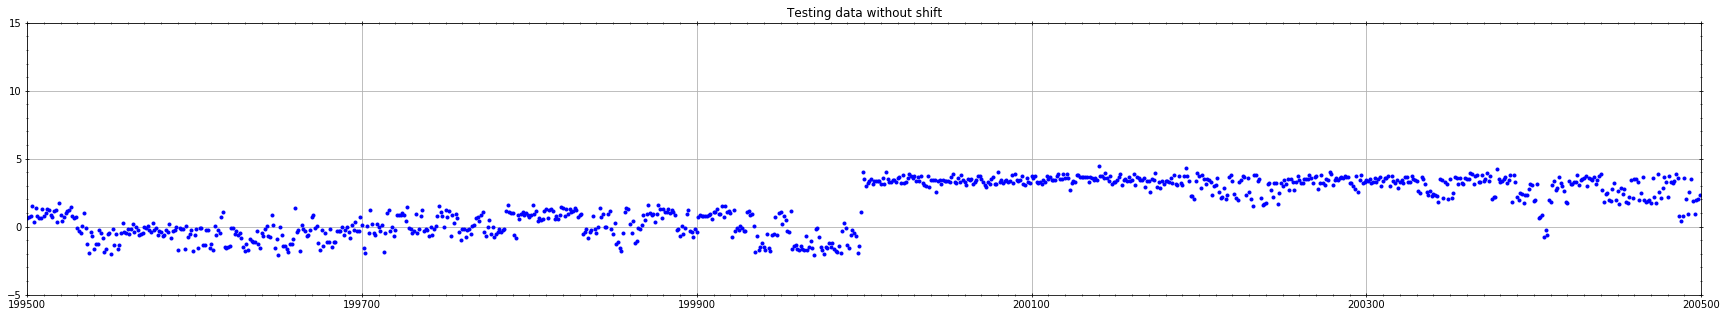

In [49]:
_, axes_final_test_signal = create_axes_grid(1, 1, 30, 5)
a, b = 199500, 200500
set_axes(axes_final_test_signal, x_val=[a, b, 200, 10], y_val=[-5, 15, 5, 1])
axes_final_test_signal.plot(pdf_tst['signal'].iloc[a:b], 'b.');
axes_final_test_signal.set_title("Testing data without shift");

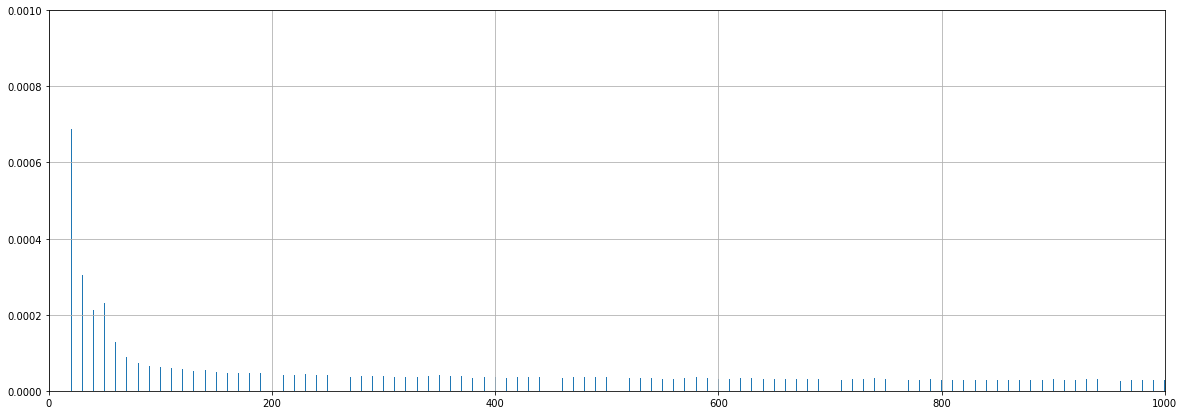

In [63]:
srs = pdf_tst['signal'].values[1000000:]
freqs, Es = welch(srs, fs=10000, nperseg=1000)
_, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.bar(freqs, Es)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 0.001)
ax.grid()